<a href="https://colab.research.google.com/github/julianasaha/food-sales-predications/blob/main/Food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [34]:
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df_ml= df.copy()

Part 2

In [35]:
# 1)How many rows and columns?
df.shape

(8523, 12)

There is 8523 rows and 12 columns.

In [36]:
#2) What are the datatypes of each variable?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


There are 4 floats, 1 integer and 7 objects.

In [37]:
#3) Are there duplicates? If so, drop any duplicates
df.duplicated().sum()

0

There are no duplicated rows.

In [38]:
#4) Identify missing values.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are 1463 out of 7060 values missing from Item_Weight. 
There are 2410 out of 6113 values missing from Outlet_Size. 

In [39]:
# 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
df.drop(columns= ['Item_Weight'], inplace = True)

In [40]:
#Outlet_mean = df['Outlet_Size'].mean()
#df['Outlet_Size'].fillna('Outlet_mean', inplace=True)
df['Outlet_Size'].fillna('Missing', inplace=True)


I have decided to remove the Item_weight column because I believe it is not essential information that will help increase prices. A lighter weight item can be just as vauable as a heavy item. 


I have decided to fill in the missing values of Outlet_Size with 'Missing' because it is likely that we can find out the size of a store later by looking it up online or even looking at the google maps to  get an estimate on how big a store is.I also believe that keeping this column is important because the size of a store can impact sales as they are able to carry more products if the store is larger.

In [41]:
# 6) Confirm that there are no missing values after addressing them.
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
#7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

In [ ]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean)
df.describe().round(2)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00
mean,0.07,140.99,1997.83,2181.29
std,0.05,62.28,8.37,1706.50
min,0.00,31.29,1985.00,33.29
25%,0.03,93.83,1987.00,834.25
50%,0.05,143.01,1999.00,1794.33
75%,0.09,185.64,2004.00,3101.30
max,0.33,266.89,2009.00,13086.96


Histogram

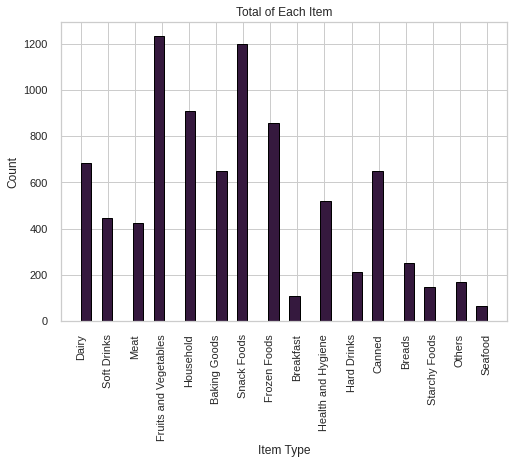

In [43]:
# Find out the quality of each type of item
df['Item_Type'].hist(bins='auto', edgecolor='black')
plt.style.use('seaborn')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.title('Total of Each Item')
plt.xticks(rotation = 90);

The top three carried item types at these stores are 'Fruit and Vegatables', 'Snack Foods', and 'Household'.

Boxplot

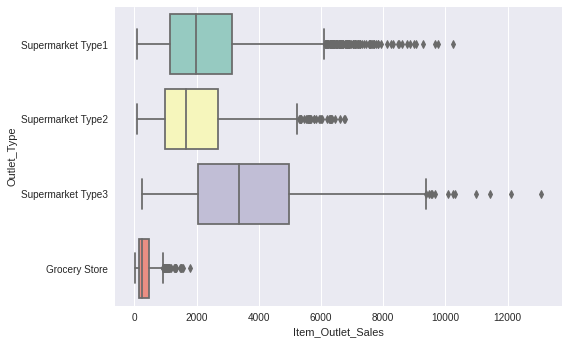

In [44]:
# Present a five number summaray for each store
sns.boxplot(data=df, x='Item_Outlet_Sales', y='Outlet_Type',
            order=['Supermarket Type1', 'Supermarket Type2','Supermarket Type3','Grocery Store'], palette="Set3");

The boxplot indicates that Supermarket 'Type3' has the highest sales while 'Grocery Store' has the lowest.

Heatmap

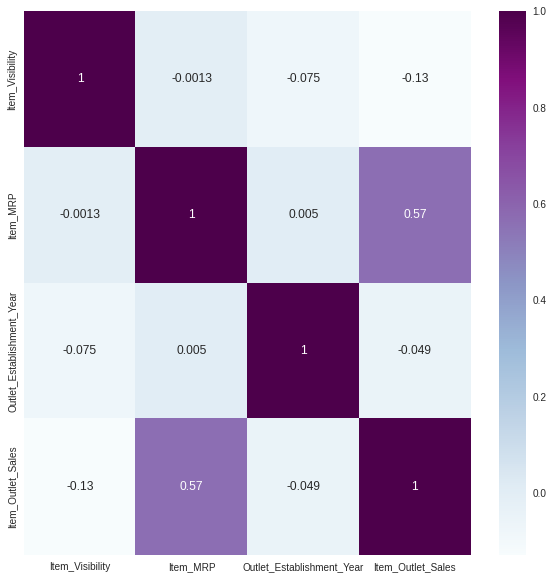

In [45]:
#find the correlation coefficients between two variables 
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='BuPu', annot=True,);

The strongest correlation indicated in this graph is between 'Item_MRP' and the weakest correlation is between 'Item_Visibility' and 'Item_Outlet_Sales'. Overall, there isn't any strong correlations, only moderate and low.

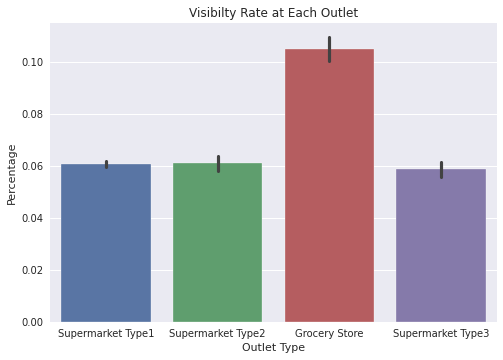

In [46]:
#graph the visibilty rate at each store 
ax = sns.barplot(data= df, x= 'Outlet_Type', y= 'Item_Visibility');
ax.set_title('Visibilty Rate at Each Outlet')
ax.set_ylabel('Percentage')
ax.set_xlabel('Outlet Type')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.labelsize'] = 'x-large'
sns.set_theme(style="whitegrid", palette="rocket")

We can see here that 'Grocery Store' has a significantly higher percentage of display area although it is the store while the lowest sales. Havig a low percenatge of display area could be a factor when increasing food sales as it has worked for the other stores being compared.

No handles with labels found to put in legend.


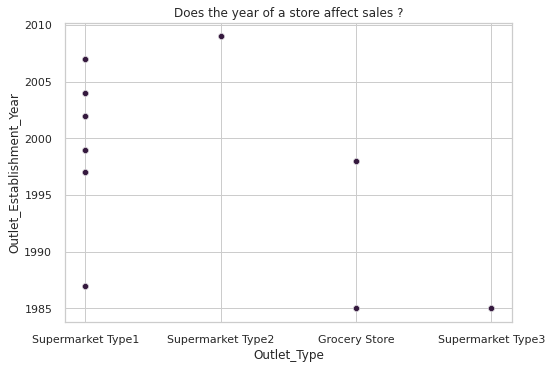

In [47]:
# grapgh the years of the outlet type
ax = sns.scatterplot(data=df, x = 'Outlet_Type', y ='Outlet_Establishment_Year', palette = 'rocket')
ax.legend().remove()
ax.set_title('Does the year of a store affect sales ?');

No handles with labels found to put in legend.


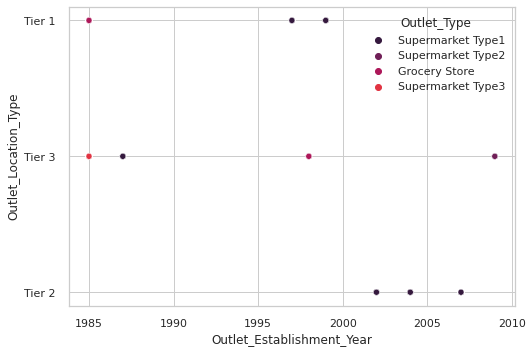

In [48]:
sns.scatterplot(data=df, x="Outlet_Establishment_Year", y="Outlet_Location_Type", hue="Outlet_Type")
ax.set_title('Does the year of a store affect sales ?')
ax.legend();

The two oldest outlets are 'Supermarket Type3' and 'Grocery Store'.

# Machine Learning Part

In [65]:
# import libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')


In [53]:
# load the data
df_ml.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [55]:
#inspect the data
print(df_ml.info(), '\n')
print(df_ml.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None 

Item_Identifier                 0
Item

In [60]:
#  Ordinal Encoding
df_ml['Outlet_Size'].value_counts()
# Ordinal Encoding 'Complication_risk'
replacement_dictionary = {'High':2, 'Medium':1, 'Small':0}
df_ml['Outlet_Size'].replace(replacement_dictionary, inplace=True)
df_ml['Outlet_Size']


0       1.0
1       1.0
2       1.0
3       NaN
4       2.0
       ... 
8518    2.0
8519    NaN
8520    0.0
8521    1.0
8522    0.0
Name: Outlet_Size, Length: 8523, dtype: float64

In [71]:
# Divide features and target
# Split
# Remove irrevelant features that do not help predict our target
# Identifers have no correlation to sales
X = df_ml.drop(columns=['Item_Outlet_Sales','Item_Identifier', 'Outlet_Identifier'], axis=1)
y = df_ml['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [88]:
# Category features
cat_selector = make_column_selector(dtype_include='object')
# Imputers
const_imputer = SimpleImputer(strategy='constant')
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Categorical pipeline
categorical_pipe = make_pipeline(const_imputer, ohe)
categorical_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [89]:
# Numerical features
num_selector = make_column_selector(dtype_include='number')
# Imputers
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [90]:
# Combine pipes
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f45308ab690>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f452c8ed510>)])

In [92]:
# fit on train (NEVER ON TEST)
preprocessor.fit(X_train)
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [93]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
# FINAL RESULT
X_train_processed


0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 33)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])